# Gunjan Chakraborty

## 22msrds007

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score

In [2]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# Preprocess the data
X_train = X_train.reshape((-1, 28, 28, 1)) / 255.0
X_test = X_test.reshape((-1, 28, 28, 1)) / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
# Define the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)),
    Conv2D(32, kernel_size=(5, 5), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer=RMSprop(), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    vertical_flip=False
)

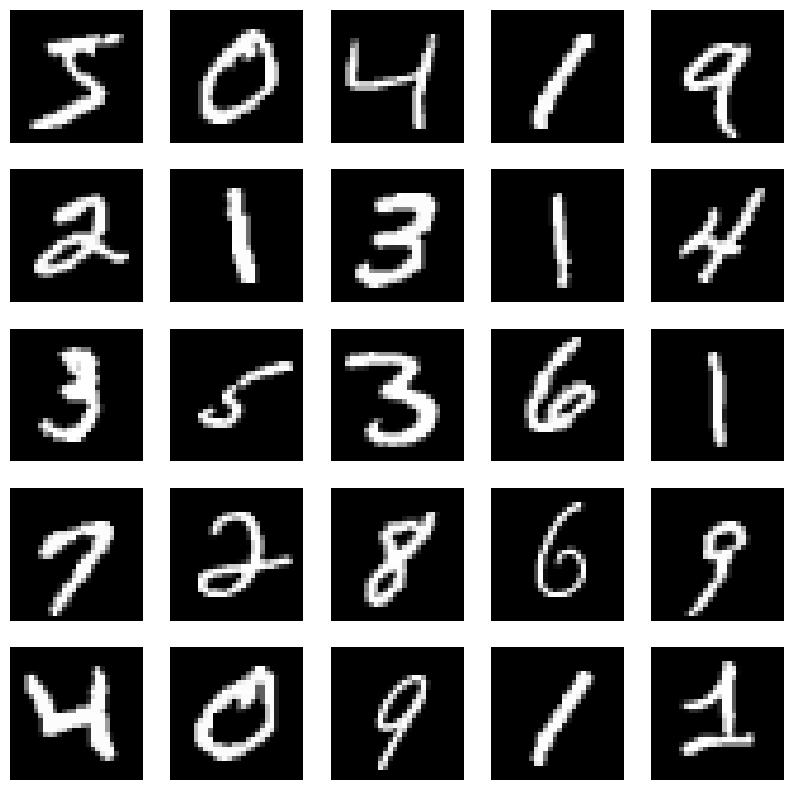

In [10]:
# Display sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

In [6]:
# Fit the model with reduced batch size and epochs
history = model.fit(datagen.flow(X_train, y_train, batch_size=128),
                    epochs=10,
                    validation_data=(X_test, y_test),
                    steps_per_epoch=len(X_train) // 128,
                    callbacks=[ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.01)])

Epoch 1/10
468/468 [==============================] - 32s 49ms/step - loss: 0.3876 - accuracy: 0.8758 - val_loss: 0.0413 - val_accuracy: 0.9847 - lr: 0.0010
Epoch 2/10
468/468 [==============================] - 20s 43ms/step - loss: 0.1099 - accuracy: 0.9674 - val_loss: 0.0279 - val_accuracy: 0.9916 - lr: 0.0010
Epoch 3/10
468/468 [==============================] - 21s 46ms/step - loss: 0.0819 - accuracy: 0.9754 - val_loss: 0.0349 - val_accuracy: 0.9878 - lr: 0.0010
Epoch 4/10
468/468 [==============================] - 20s 43ms/step - loss: 0.0685 - accuracy: 0.9794 - val_loss: 0.0169 - val_accuracy: 0.9943 - lr: 0.0010
Epoch 5/10
468/468 [==============================] - 21s 44ms/step - loss: 0.0617 - accuracy: 0.9824 - val_loss: 0.0168 - val_accuracy: 0.9949 - lr: 0.0010
Epoch 6/10
468/468 [==============================] - 21s 45ms/step - loss: 0.0572 - accuracy: 0.9828 - val_loss: 0.0152 - val_accuracy: 0.9949 - lr: 0.0010
Epoch 7/10
468/468 [==============================] - 21s 

In [12]:
# Evaluate the model
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)

313/313 [==============================] - 1s 2ms/step


In [13]:
# Get train accuracy
train_accuracy = history.history['accuracy'][-1]

print(f"Train accuracy: {train_accuracy}")
print(f"Test accuracy: {test_accuracy}")

Train accuracy: 0.9874064922332764
Test accuracy: 0.9931


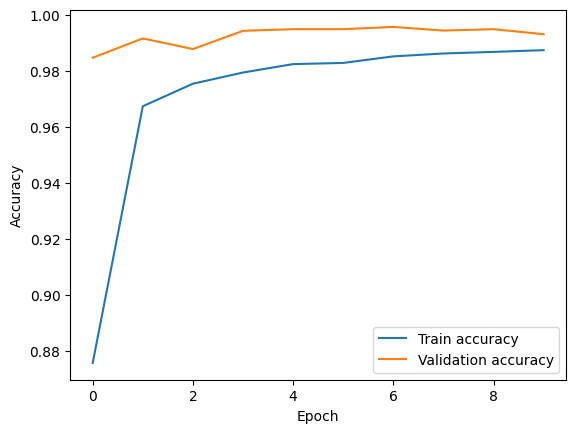

In [14]:
# Plot train and validation accuracy
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()